# Vendor Performance Analytics — Exploratory Data Analysis (EDA)

This notebook performs an end-to-end EDA on the Vendor Sales Summary dataset using Python. It focuses on understanding vendor-level sales, profitability, product performance, and operational patterns. The analysis includes data cleaning, statistical summaries, distribution checks, correlation insights, and visual exploration of sales, margins, and vendor contributions.

Key areas covered:

* Data loading, cleaning, and handling invalid/zero values

* Descriptive statistics and outlier detection

* Distribution analysis using histograms and boxplots

* Vendor and product category insights

* Correlation analysis for sales, quantity, margins, and profitability

* Ranking top vendors/brands and identifying low-performing ones


* Plotted profit margin distributions and calculated 95% confidence intervals for top vs. low vendors to compare their performance.
* Performed a two-sample t-test to check whether profit margins Differ significantly between top and low-performing vendors.

This notebook converts raw vendor data into clear, actionable insights that enable understanding of performance and identification of opportunities for improvement.

In [1]:
# Import required libraries for EDA:
# - pandas & numpy for data manipulation
# - matplotlib & seaborn for visualizations
# - scipy for statistical tests
# - warnings to suppress unnecessary warnings for cleaner output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [2]:
# Load the cleaned vendor sales summary dataset and preview the first few rows
# to confirm successful import and understand the structure of the data
df= pd.read_csv("vendor_sales_summary.csv")
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnOver,SaletoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,68601.68,142049,5101919.51,672819.31,260999.20,1290667.91,25.29769251,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,144929.24,160247,4819073.49,561512.37,294438.66,1015032.27,21.06280952,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,123780.22,187140,4538120.60,461140.15,343854.07,1119816.92,24.67578583,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,257032.07,200412,4475972.88,420050.01,368242.80,1214774.94,27.13990841,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,257032.07,135838,4223107.62,545778.28,249587.83,1199901.61,28.4127642,0.983556,1.396897


In [3]:
# Inspect data types of all columns
df.dtypes

,0
VendorNumber,int64
VendorName,object
Brand,int64
Description,object
PurchasePrice,float64
Volume,float64
ActualPrice,float64
TotalPurchaseQuantity,int64
TotalPurchaseDollars,float64
TotalFreightCost,float64


**Exploratory Data Analysis**


*   Previously, we examined the various table in database to identify key variables, understand their relationship, and determine which ones should be included in the final analysis.

*   In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.



In [4]:
# Convert ProfitMargin to numeric (coerce invalid entries to NaN)
df['ProfitMargin'] = pd.to_numeric(df['ProfitMargin'], errors='coerce')

In [5]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00000,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.36000,6.840000,10.455000,19.482500,5.681810e+03
Volume,10692.0,847.360550,664.309212,50.00000,750.000000,750.000000,750.000000,2.000000e+04
ActualPrice,10692.0,35.643671,148.246016,0.49000,10.990000,15.990000,28.990000,7.499990e+03
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00000,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71000,453.457500,3655.465000,20738.245000,3.811252e+06
TotalFreightCost,10692.0,61433.763214,60938.458032,0.09000,14069.870000,50293.620000,79528.990000,2.570321e+05
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00000,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.00000,729.220000,5298.045000,28396.915000,5.101920e+06


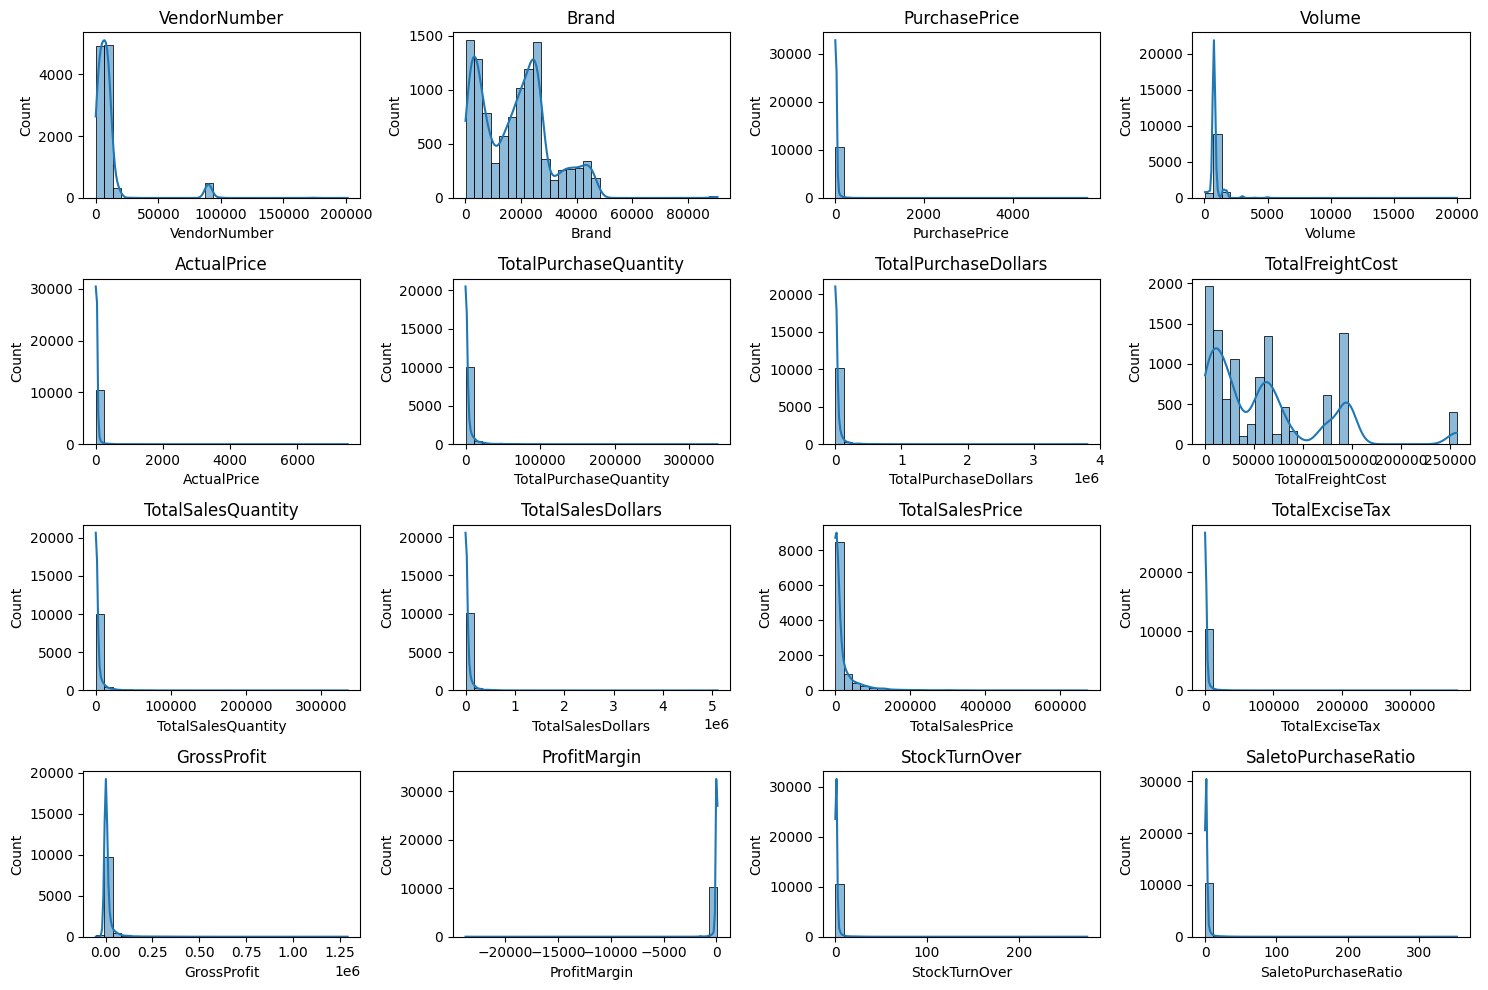

In [6]:
# Plot distribution curves for all numerical columns to understand their spread,
# detect skewness, outliers, and overall data distribution for each metric.
numerical_cols  = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

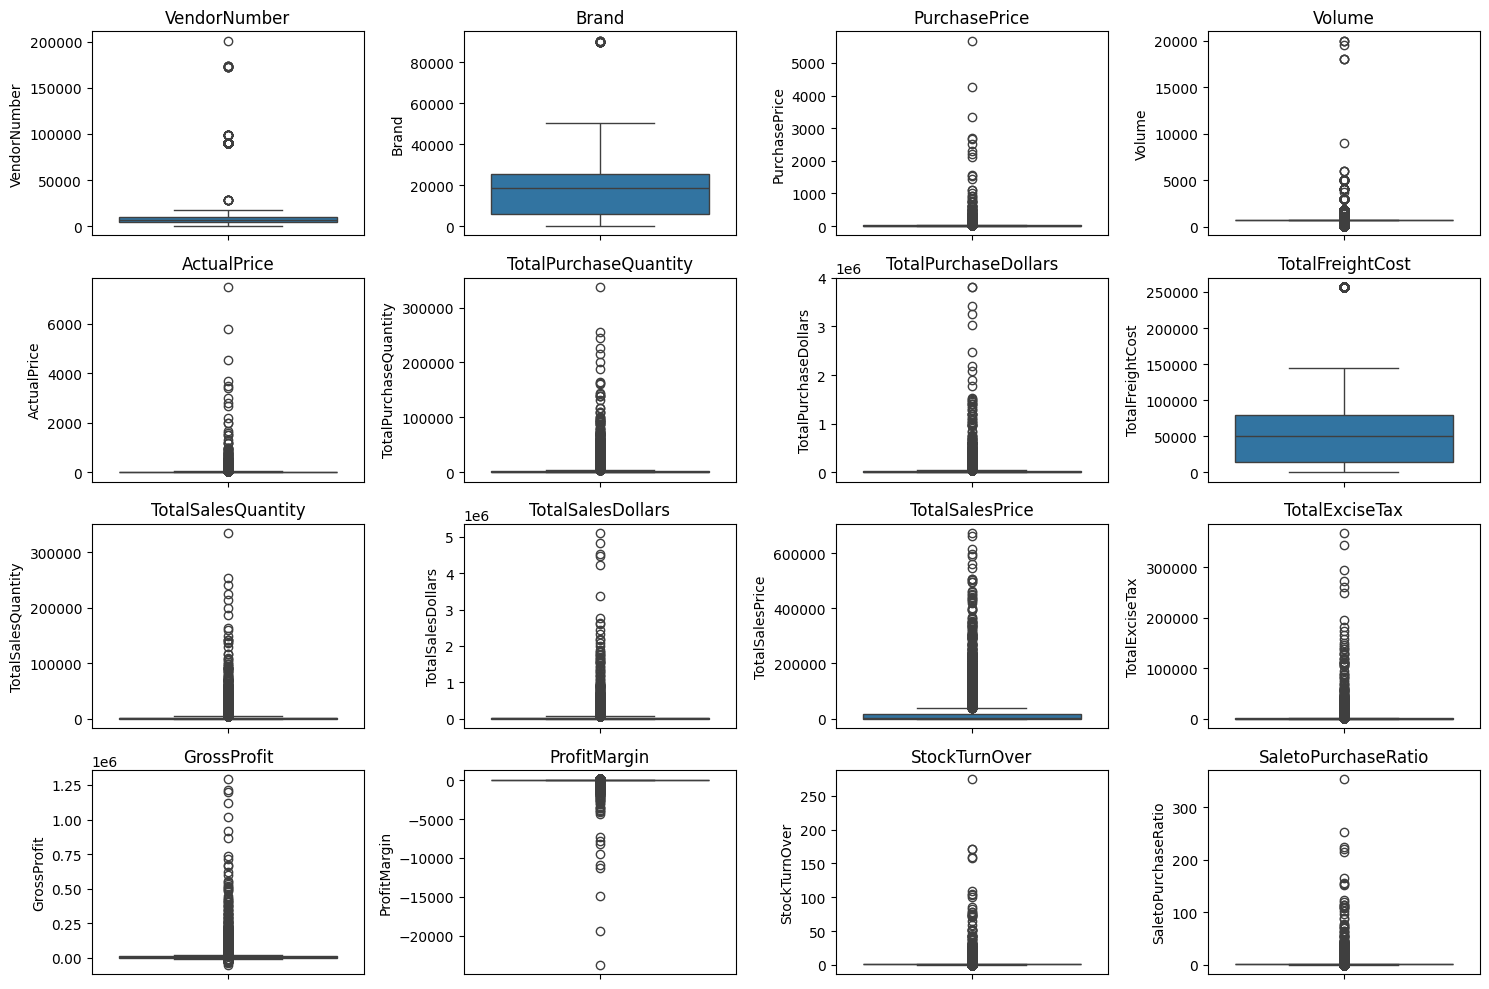

In [7]:
# Generate boxplots for all numerical columns to visually identify outliers
# and understand the spread and variability of each metric.
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.boxplot(y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

**Summary Statistics Insights:**

**Negative & Zero values:**
*  Gross Profit:Minimum value is -52002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
* Minimum Profit Margin: –23,730.64
Indicates a massive loss or potential data anomaly.
*  Total Sales Quantity & Sales Dollars:Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers indicated by High Standard Deviations:**


*  Purchase & Actual Prices:The max values (5681.81 & 7499.99) are significantly higher than the mean (24.39&35.64), indicating potential premium products.
*  Frieght Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

*  Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. A value more than 1 indicates that the sold quantity for that product is higher than the purchased quantity due to either sales being fulfilled from older stock.









In [8]:


# Filter rows with positive GrossProfit, ProfitMargin, and TotalSalesQuantity
df = df[
    (df['GrossProfit'] > 0) &
    (df['ProfitMargin'] > 0) &
    (df['TotalSalesQuantity'] > 0)
].dropna()



In [9]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalFreightCost,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,GrossProfit,ProfitMargin,StockTurnOver,SaletoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080,3811251.60,68601.68,142049,5101919.51,672819.31,260999.20,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038,3804041.22,144929.24,160247,4819073.49,561512.37,294438.66,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407,3418303.68,123780.22,187140,4538120.60,461140.15,343854.07,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682,3261197.94,257032.07,200412,4475972.88,420050.01,368242.80,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109,3023206.01,257032.07,135838,4223107.62,545778.28,249587.83,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2,2.64,27100.41,5,15.95,10.96,0.55,13.31,83.448276,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6,2.34,50293.62,134,65.66,1.47,7.04,63.32,96.436186,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,50.0,0.99,2,1.48,14069.87,2,1.98,0.99,0.10,0.50,25.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1,1.47,257032.07,72,143.28,77.61,15.12,141.81,98.974037,72.000000,97.469388


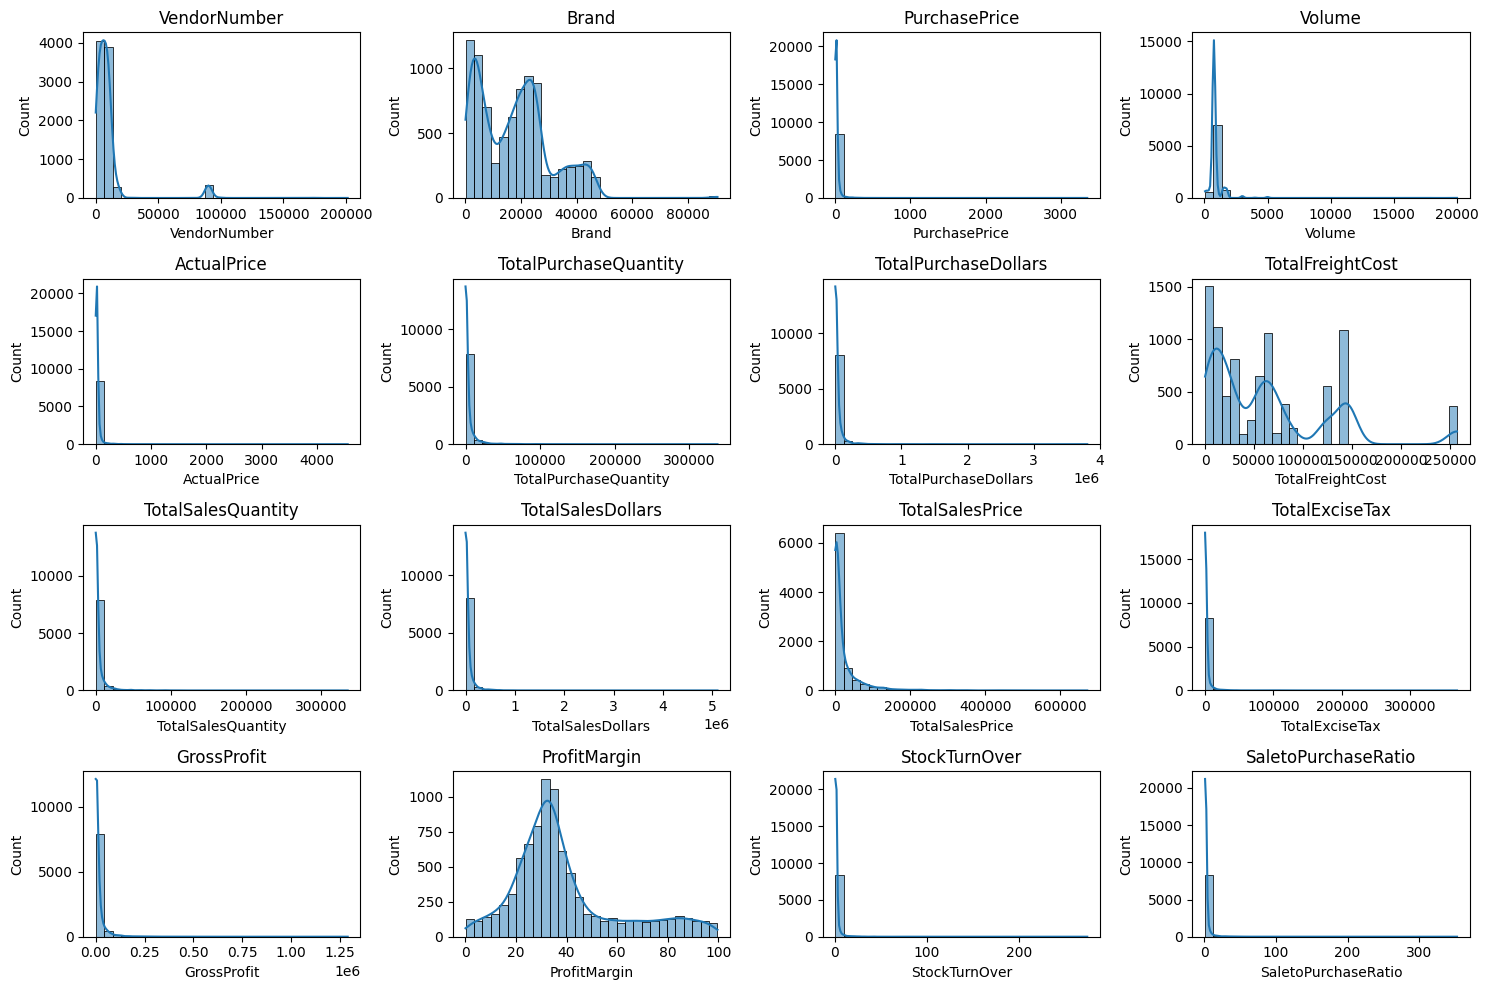

In [10]:

# Re-plot numerical distributions after filtering to analyze cleaned data.

numerical_cols  = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

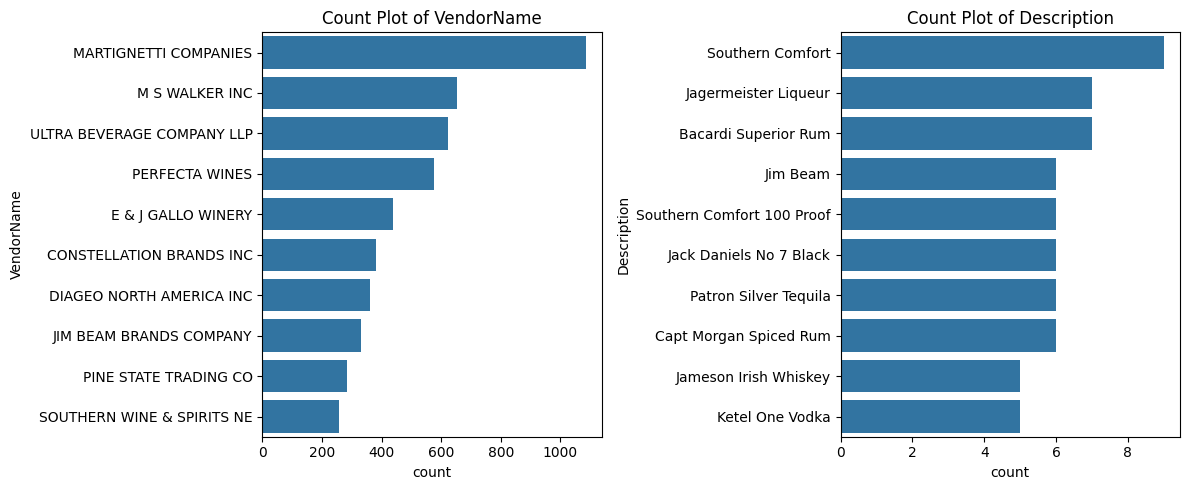

In [11]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
  plt.subplot(1,2,i+1)
  sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
  plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

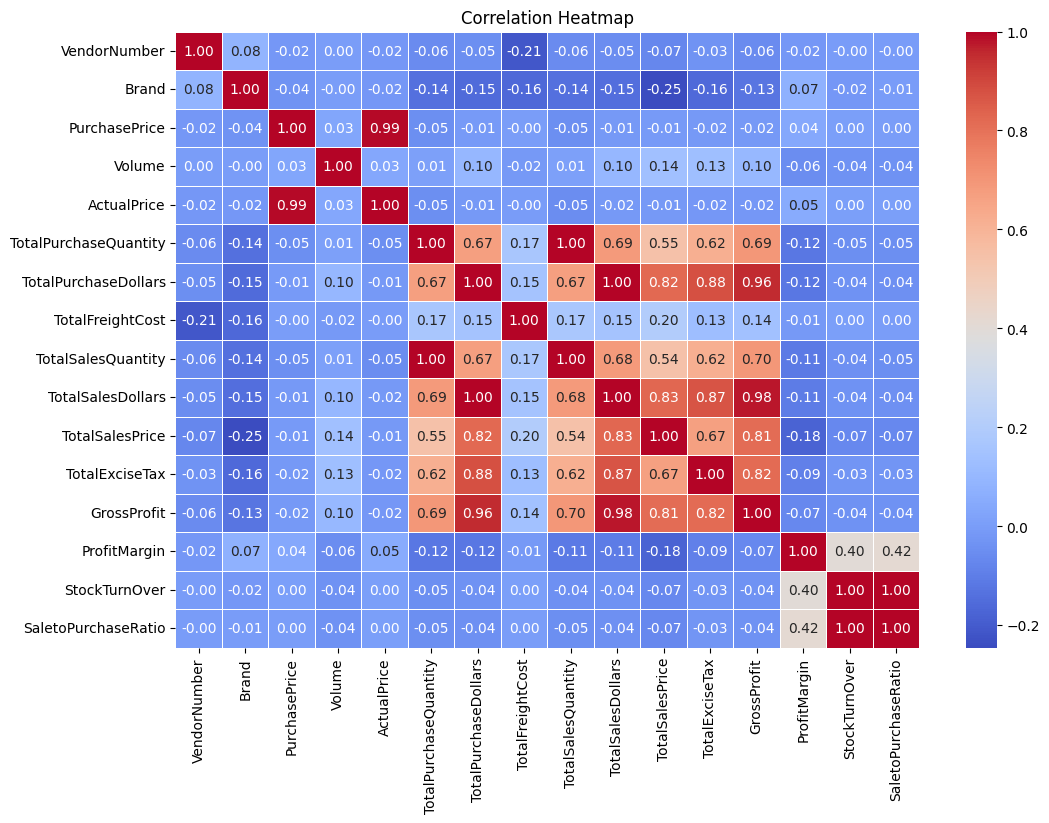

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Correlation Insights**

*   PuchasePrice has weak correlations with TotalSalesDollars (-0.01) and GrossProfit(-0.02), suggesting that price variations do not significantly impact sales revenue or profit.
*   Strong Correlation between TotalPurchaseQuantity and TotalSalesQuantity (1.00), confirming efficient inventory power.
*   Negative correlation between ProfitMargin and TotalSalesPrice (-0.18) suggests that as sales price increases, margin decrease, possibly due to competitive pricing pressures.
*   StockTurnover has week negative correlation with both GrossProfit (-0.04)  indicating that faster turnover does not necessarily result in higher profitability





**Data Analysis**

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [14]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold


np.float64(560.299)

In [16]:
high_margin_threshold

np.float64(64.97017552299997)

In [17]:
# Filter brands with low sales but high profit margins
target_brands=brand_performance[
    (brand_performance['TotalSalesDollars']<=low_sales_threshold) &
     (brand_performance['ProfitMargin']>=high_margin_threshold)]
print("Brands with Low Sales and High Profit Margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales and High Profit Margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


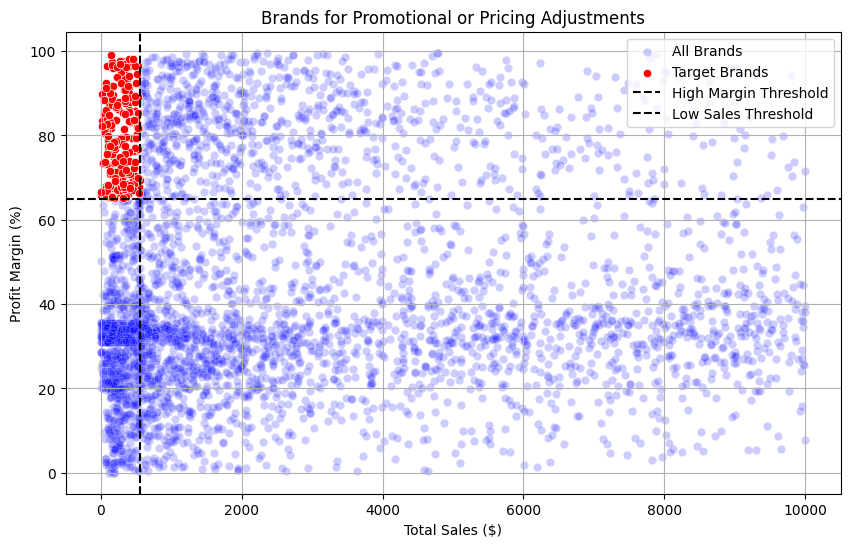

In [18]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] <10000]  # for better visualization

# Scatter plot shows Total Sales vs Profit Margin, highlighting target brands in red.
# Horizontal and vertical dashed lines represent high-margin and low-sales thresholds.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All Brands', alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstrate the highest sales performance?

In [19]:
# Function to format numeric values as dollar amounts with K (thousands) or M (millions) suffix for readability.

def format_dollars(value):
  if value>=1_000_000:
    return f"${value/1_000_000:.2f}M"
  elif value>=1_000:
    return f"${value/1_000:.2f}K"
  else:
    return str(value)

In [20]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands= df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors.apply(lambda x: format_dollars(x))

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,$67.99M
MARTIGNETTI COMPANIES,$39.33M
PERNOD RICARD USA,$32.06M
JIM BEAM BRANDS COMPANY,$31.42M
BACARDI USA INC,$24.85M
CONSTELLATION BRANDS INC,$24.22M
E & J GALLO WINERY,$18.40M
BROWN-FORMAN CORP,$18.25M
ULTRA BEVERAGE COMPANY LLP,$16.50M


In [21]:
top_brands.apply(lambda x: format_dollars(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,$7.96M
Tito's Handmade Vodka,$7.40M
Grey Goose Vodka,$7.21M
Capt Morgan Spiced Rum,$6.36M
Absolut 80 Proof,$6.24M
Jameson Irish Whiskey,$5.72M
Ketel One Vodka,$5.07M
Baileys Irish Cream,$4.15M
Kahlua,$3.60M


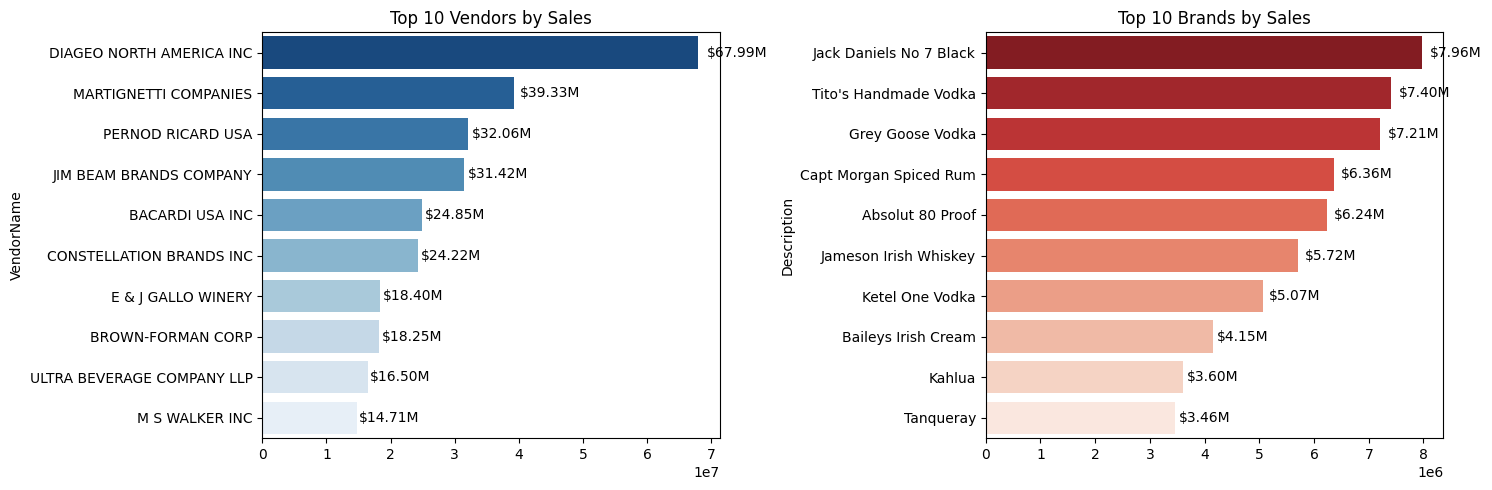

In [22]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

Which Vendor contribute the most to total purchase dollars?

In [23]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [24]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [25]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [26]:
# Display top 10 Vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18


In [27]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [28]:
top_vendors['cumulative_contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,$50.10M,$17.89M,$67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,$25.50M,$13.83M,$39.33M,8.30,24.60
68,PERNOD RICARD USA,$23.85M,$8.21M,$32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,$23.49M,$7.93M,$31.42M,7.64,40.00
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,$15.27M,$8.95M,$24.22M,4.97,50.64
11,BROWN-FORMAN CORP,$13.24M,$5.01M,$18.25M,4.31,54.95
30,E & J GALLO WINERY,$12.07M,$6.33M,$18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,$11.17M,$5.34M,$16.50M,3.63,62.51
53,M S WALKER INC,$9.76M,$4.94M,$14.71M,3.18,65.69


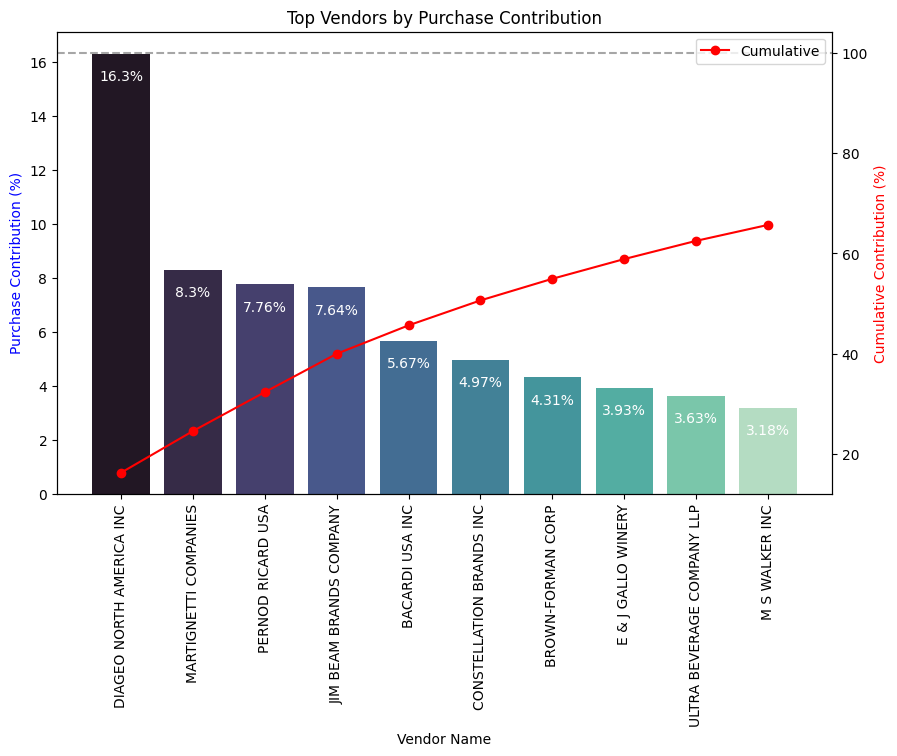

In [29]:
fig, ax1=plt.subplots(figsize=(10,6))

# Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
  ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line plot for Cumulative Contribution%
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['cumulative_contribution%'], color='red', marker='o', linestyle='-', label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution (%)', color='blue')
ax2.set_ylabel('Cumulative Contribution (%)', color='red')
ax1.set_title('Top Vendors by Purchase Contribution')
ax1.set_xlabel('Vendor Name')

ax2.axhline(y=100, color='gray', linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

How much of total procurement is dependent on the top vendors?

In [30]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


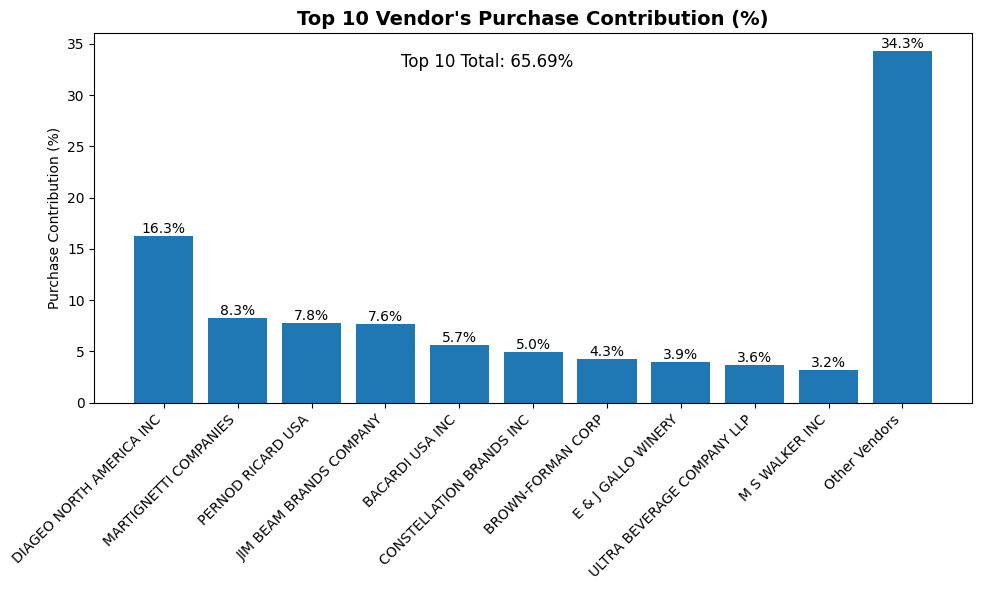

In [31]:
vendors=list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

# append "Other vendors" category
vendors.append("Other Vendors")
purchase_contribution.append(remaining_contribution)



# Bar Chart
fig, ax = plt.subplots(figsize=(10,6))

# Create the bar chart
bars = ax.bar(vendors, purchase_contribution)

# Annotate % values on top of each bar
for bar, value in zip(bars, purchase_contribution):
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{value:.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Chart title
plt.title("Top 10 Vendor's Purchase Contribution (%)", fontsize=14, fontweight='bold')

# Rotate vendor labels for readability
plt.xticks(rotation=45, ha='right')

# Add y-axis label
plt.ylabel("Purchase Contribution (%)")

# Add total contribution text below title
plt.figtext(0.5, 0.88, f"Top 10 Total: {total_contribution:.2f}%", ha='center', fontsize=12)

# Adjust spacing
plt.tight_layout()

plt.show()


Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [32]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [33]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium", "Large"])

In [34]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
10687,Small,2
10688,Small,6
10689,Small,2
10690,Small,1


In [35]:
df.groupby('OrderSize', observed=True)['UnitPurchasePrice'].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


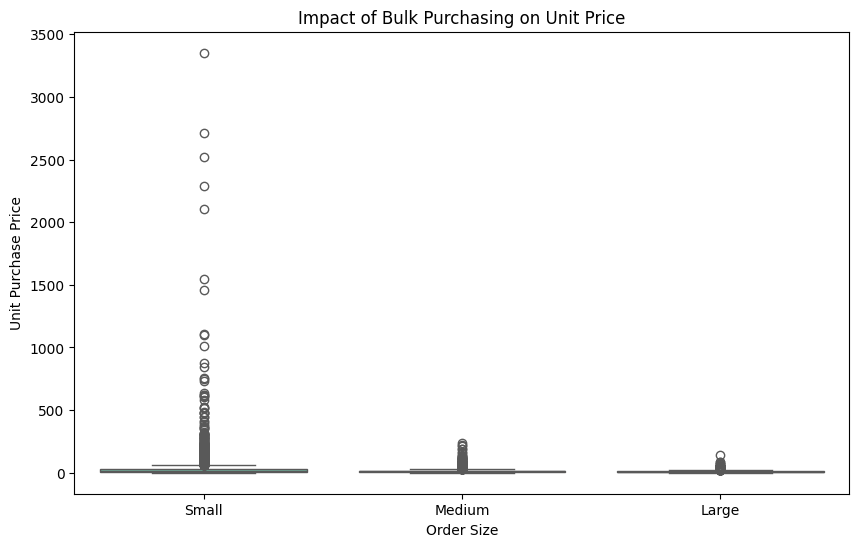

In [36]:
# Create a boxplot to visualize how unit purchase price varies across different order sizes (Small, Medium, Large).

plt.figure(figsize=(10,6))
sns.boxplot(data=df,
    x="OrderSize",
    y="UnitPurchasePrice",
    hue="OrderSize",
    palette="Set2",
    legend=False
)

plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Unit Purchase Price')
plt.show()

*   Vendor buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
*   The price difference between Small and Large orders is substantial (~72% reduction in unit cost).

*   This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower
per-unit revenue.






Which Vendor have low inventory turnover, indicating excess stock and slow-moving products?

In [37]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values(by='StockTurnOver', ascending=True).head(10)

,StockTurnOver
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, and which vendor contribute the most to it?

In [38]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: $2.71M


In [39]:
inventory_value_per_vendor= df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']= inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)

inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,$722.21K
46,JIM BEAM BRANDS COMPANY,$554.67K
68,PERNOD RICARD USA,$470.63K
116,WILLIAM GRANT & SONS INC,$401.96K
30,E & J GALLO WINERY,$228.28K
79,SAZERAC CO INC,$198.44K
11,BROWN-FORMAN CORP,$177.73K
20,CONSTELLATION BRANDS INC,$133.62K
61,MOET HENNESSY USA INC,$126.48K
77,REMY COINTREAU USA INC,$118.60K


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [40]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [41]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]['ProfitMargin'].dropna()

In [42]:
top_vendors

,ProfitMargin
0,25.297693
1,21.062810
2,24.675786
3,27.139908
4,28.412764
...,...
3966,79.684817
4170,85.782102
5530,93.085860
5773,95.012530


In [43]:
low_vendors

,ProfitMargin
6728,4.111764
6761,6.145626
6825,12.007271
6828,1.677308
6861,7.239599
...,...
10687,83.448276
10688,96.436186
10689,25.252525
10690,98.974037


In [44]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  #Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% Confidence Interval: (30.74, 31.61, 31.18)
Low Vendors 95% Confidence Interval: (40.50, 42.64, 41.57)


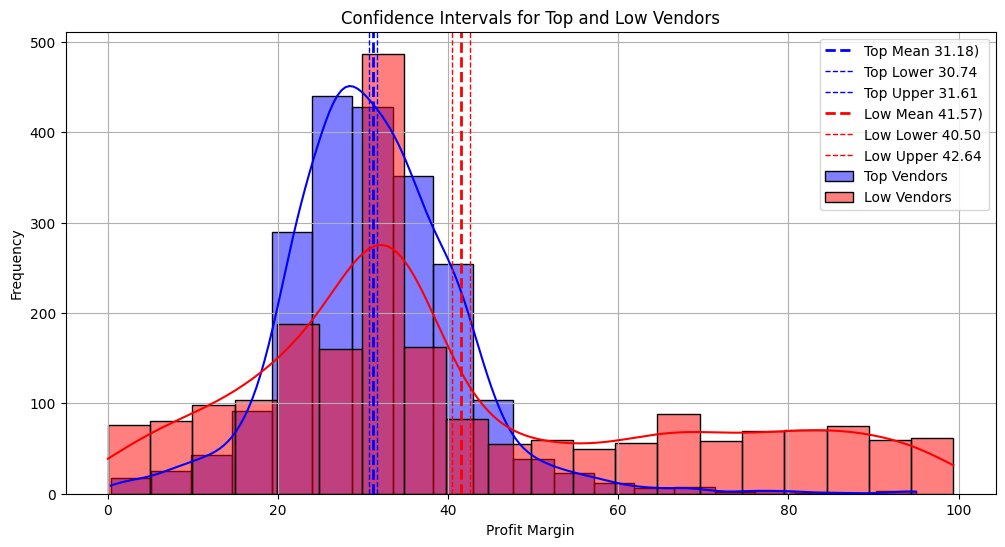

In [45]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% Confidence Interval: ({top_lower:.2f}, {top_upper:.2f}, {top_mean:.2f})")
print(f"Low Vendors 95% Confidence Interval: ({low_lower:.2f}, {low_upper:.2f}, {low_mean:.2f})")

plt.figure(figsize=(12, 6))
# Top Vendors Plot
sns.histplot(top_vendors, bins=20, kde=True, color='blue', label='Top Vendors')
plt.axvline(top_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Top Mean {top_mean:.2f})")
plt.axvline(top_lower, color='blue', linestyle='dashed', linewidth=1, label=f"Top Lower {top_lower:.2f}")
plt.axvline(top_upper, color='blue', linestyle='dashed', linewidth=1, label=f"Top Upper {top_upper:.2f}")


# Low Vendors Plot
sns.histplot(low_vendors, bins=20, kde=True, color='red', label='Low Vendors')
plt.axvline(low_mean, color='red', linestyle='dashed', linewidth=2, label=f"Low Mean {low_mean:.2f})")
plt.axvline(low_lower, color='red', linestyle='dashed', linewidth=1, label=f"Low Lower {low_lower:.2f}")
plt.axvline(low_upper, color='red', linestyle='dashed', linewidth=1, label=f"Low Upper {low_upper:.2f}")

#Finalize Plot
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.title('Confidence Intervals for Top and Low Vendors')
plt.legend()
plt.grid(True)
plt.show()




*   The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors(30.74% to 31.61%).
*   This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

*   For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
*   For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing , competitive pricing , or improved distribution strategies.





**Is there a significant difference in profit margins between top-performing and low-performing vendors?**

Hypothesis:
Ho(Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H1(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.



In [46]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]['ProfitMargin'].dropna()

# Perform Two-sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"t-statistic: {t_stat:.4f},p-value: {p_value:.4f}")
if p_value<0.05:
  print("reject Ho: There is significant difference between profit margins of top and low performing vendors")
else:
  print("Fail to reject Ho: There is no significant difference between profit margins of top and low performing vendors")

t-statistic: -17.6695,p-value: 0.0000
reject Ho: There is significant difference between profit margins of top and low performing vendors
